In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt                             
import seaborn as sns

In [2]:
data = pd.read_csv("customer_booking.csv", encoding="latin1")
data.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [5]:
data['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [6]:
cols = ["sales_channel", "trip_type","flight_day"]

**Table of contents**<a id='toc0_'></a>    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

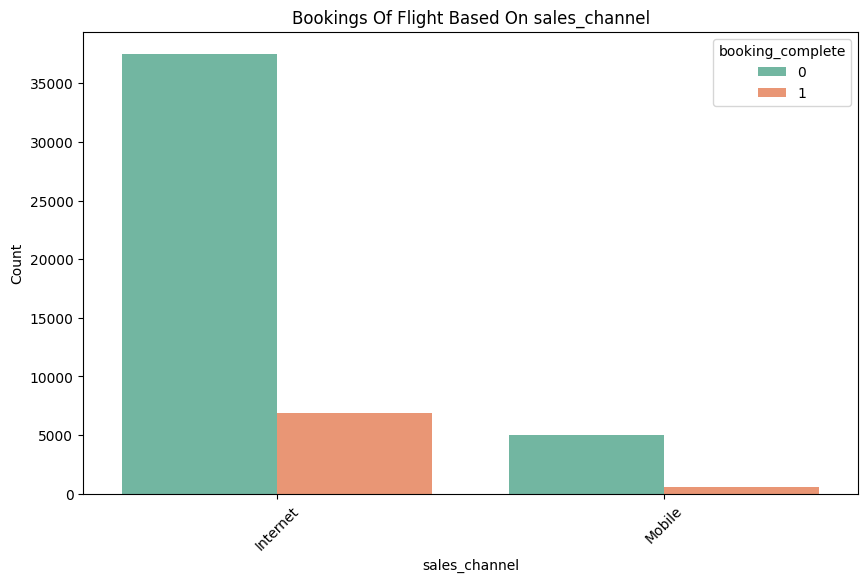

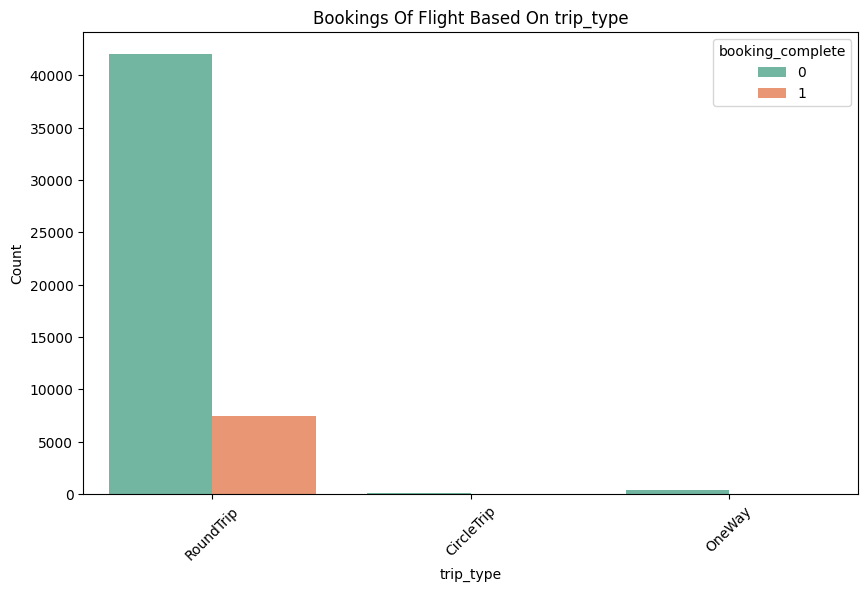

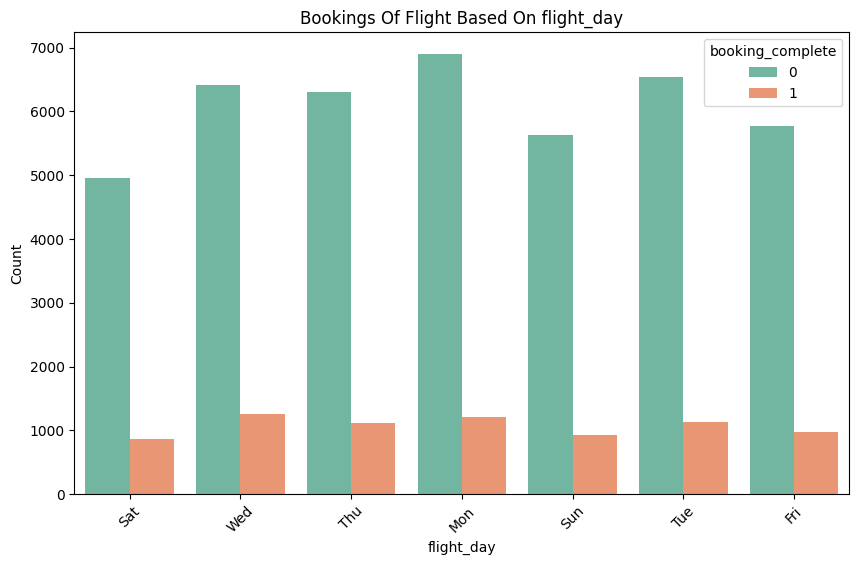

In [7]:
for  col in cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, hue="booking_complete", data=data, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Bookings Of Flight Based On {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [8]:
eval= ["sales_channel", "trip_type","flight_day","route","booking_origin"]


In [9]:
for col in eval:
    if col in data.columns:
            data[col] = data[col].astype("category").cat.codes

In [10]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [11]:
cols_to_scale = ["purchase_lead","length_of_stay","flight_hour","flight_duration"]

In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
data_scaled = data.copy()
data_scaled[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [15]:
data_scaled.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,1.957530,-0.119353,-0.381764,2,0,61,1,0,0,-1.174175,0
1,1,0,2,0.299164,-0.089844,-1.120780,2,0,61,0,0,0,-1.174175,0
2,2,0,2,1.747470,-0.030824,1.465775,6,0,36,1,1,0,-1.174175,0
3,1,0,2,0.122272,0.234761,-0.936026,2,0,61,0,0,1,-1.174175,0
4,2,0,2,-0.187290,-0.030824,1.096267,6,0,36,1,0,1,-1.174175,0


In [16]:
from sklearn.model_selection import train_test_split
X = data_scaled.drop("booking_complete", axis=1)
y = data_scaled["booking_complete"]

In [17]:
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

data = np.hstack((X, np.reshape(y, (-1, 1)))) 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      8444
           1       0.94      0.99      0.97      8565

    accuracy                           0.96     17009
   macro avg       0.97      0.96      0.96     17009
weighted avg       0.97      0.96      0.96     17009



In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Mean is: ", np.mean(scores))

Mean is:  0.5676468753717735


In [25]:
# Convert negative MSE to positive for interpretability
mse_scores = -scores
print(f"Cross-validation MSE scores: {mse_scores}")
print(f"Mean MSE: {mse_scores.mean():.3f}")

Cross-validation MSE scores: [-0.55888059 -0.6757011  -0.5278382  -0.54729849 -0.52851599]
Mean MSE: -0.568


In [26]:
import joblib

joblib.dump(model, 'airline_booking_model.pkl')

['airline_booking_model.pkl']